# 📊 Classification Metrics: Confusion Matrix, Precision, Recall, F1 Score

---

## ✅ 1. Confusion Matrix

A **confusion matrix** is a table used to evaluate the performance of a classification algorithm.

For a binary classification problem:

|                   | **Predicted Positive** | **Predicted Negative** |
|-------------------|------------------------|------------------------|
| **Actual Positive** | True Positive (TP)      | False Negative (FN)     |
| **Actual Negative** | False Positive (FP)     | True Negative (TN)      |

### Key Terms:
- **True Positive (TP)**: Model correctly predicted the positive class.
- **False Positive (FP)**: Model incorrectly predicted positive class (Type I error).
- **False Negative (FN)**: Model incorrectly predicted negative class (Type II error).
- **True Negative (TN)**: Model correctly predicted the negative class.

---

## 🎯 2. Precision

**Precision** measures how many of the predicted positives are truly positive.

\[
\text{Precision} = \frac{TP}{TP + FP}
\]

- High precision means **low false positive rate**.
- Important in use-cases like **spam detection** or **fraud detection**.

---

## 📥 3. Recall (Sensitivity / True Positive Rate)

**Recall** measures how many of the actual positives are correctly predicted.

\[
\text{Recall} = \frac{TP}{TP + FN}
\]

- High recall means **low false negative rate**.
- Important in scenarios like **disease detection** where missing positives is costly.

---

## ⚖️ 4. F1 Score

The **F1 Score** is the **harmonic mean** of Precision and Recall. It balances the trade-off between the two.

\[
\text{F1 Score} = 2 \times \frac{Precision \times Recall}{Precision + Recall}
\]

- Best when you want to balance **precision and recall**.
- Useful when classes are **imbalanced**.

---

## 🔍 Example

Suppose a model makes predictions with the following confusion matrix:

|                   | Predicted Positive | Predicted Negative |
|-------------------|--------------------|--------------------|
| Actual Positive   | TP = 70            | FN = 30            |
| Actual Negative   | FP = 10            | TN = 90            |

- **Precision** = 70 / (70 + 10) = 0.875
- **Recall** = 70 / (70 + 30) = 0.70
- **F1 Score** = 2 × (0.875 × 0.70) / (0.875 + 0.70) ≈ 0.778

---

## ✅ Summary Table

| Metric     | Formula                              | Focus                         |
|------------|---------------------------------------|-------------------------------|
| Precision  | TP / (TP + FP)                        | How accurate are positive predictions? |
| Recall     | TP / (TP + FN)                        | How many actual positives were captured? |
| F1 Score   | 2 × (Precision × Recall) / (Precision + Recall) | Balance between precision & recall |

---

## 📌 Tip

Use:
- **Precision** when false positives are costly
- **Recall** when false negatives are costly
- **F1 Score** for a balance or when dealing with **imbalanced classes**


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/college-placement/placement-dataset.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
dataset = pd.read_csv(r"/kaggle/input/college-placement/placement-dataset.csv")
dataset

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [4]:
x = dataset.iloc[:,:-1]
y = dataset["placement"]

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [8]:
lr.score(x_test,y_test)*100

90.0

In [9]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

In [10]:
cf = confusion_matrix(y_test,lr.predict(x_test))

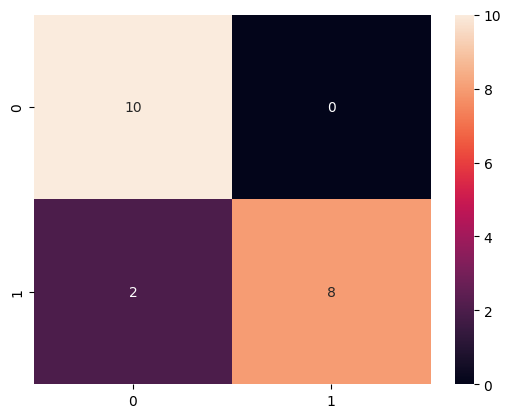

In [11]:
sns.heatmap(cf,annot=True)
plt.show()

In [12]:
precision_score(y_test,lr.predict(x_test))*100

100.0

In [13]:
recall_score(y_test,lr.predict(x_test))*100

80.0

In [14]:
f1_score(y_test,lr.predict(x_test))*100

88.8888888888889